In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout



In [4]:
# -----------------------------
# Parameters
# -----------------------------
FOLDER = "/content/drive/MyDrive/TMSL_30_6_25/input/set_a"  # Your folder path with all .wav files
SR = 1000               # Sampling rate
DURATION = 3            # Seconds
MAX_LEN = SR * DURATION
N_MELS = 64             # Mel bands
N_FFT = 256
HOP_LENGTH = 128


In [5]:

# -----------------------------
# Load and preprocess data using Mel Spectrogram
# -----------------------------
def extract_mel_spectrogram(signal, sr):
    mel = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=N_MELS, n_fft=N_FFT, hop_length=HOP_LENGTH)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    return mel_db


In [6]:
def load_data(folder):
    X, y = [], []
    for fname in os.listdir(folder):
        if fname.endswith(".wav"):
            label = fname.split("_")[0].lower()
            path = os.path.join(folder, fname)

            signal, _ = librosa.load(path, sr=SR)
            if len(signal) < MAX_LEN:
                signal = np.pad(signal, (0, MAX_LEN - len(signal)))
            else:
                signal = signal[:MAX_LEN]

            mel_spec = extract_mel_spectrogram(signal, SR)
            X.append(mel_spec)
            y.append(label)

    return np.array(X), np.array(y)


In [7]:
X, y = load_data(FOLDER)

In [8]:
X

array([[[-75.34731 , -75.34731 , -75.34731 , ..., -24.25273 ,
         -20.250105, -24.088003],
        [-75.34731 , -75.34731 , -75.34731 , ..., -22.872988,
         -17.17306 , -16.456945],
        [-75.34731 , -75.34731 , -75.34731 , ..., -23.197638,
         -22.379522, -20.887426],
        ...,
        [-75.34731 , -75.34731 , -75.34731 , ..., -22.04151 ,
         -19.788652, -17.34828 ],
        [-75.34731 , -75.34731 , -75.34731 , ..., -35.615273,
         -33.5774  , -29.172186],
        [-75.34731 , -75.34731 , -75.34731 , ..., -54.45536 ,
         -51.07952 , -30.126822]],

       [[-25.40435 , -20.810574, -27.748735, ..., -41.9441  ,
         -44.17761 , -50.224934],
        [-25.563322, -18.567476, -18.95357 , ..., -43.977013,
         -45.26984 , -48.174133],
        [-31.011543, -19.953865, -10.204609, ..., -45.90418 ,
         -46.413815, -44.125046],
        ...,
        [-24.041286, -16.236225, -19.399082, ..., -47.055065,
         -48.499203, -51.44501 ],
        [-34

In [22]:
import numpy as np
np.unique(y)


array(['artifact', 'aunlabelledtest', 'extrahls', 'murmur', 'normal'],
      dtype='<U15')

In [10]:
X.shape

(149, 64, 24)

In [11]:
# Convert Mel-Spectrograms to (samples, time, mel) for Conv1D
X = X.transpose((0, 2, 1))


In [12]:
X.shape

(149, 24, 64)

In [15]:
# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)
y_categorical

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1.

In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)


In [18]:
print("Total  data size=",X.shape)
print("Train data size=",X_train.shape)
print("Test data size=",X_test.shape )

Total  data size= (149, 24, 64)
Train data size= (119, 24, 64)
Test data size= (30, 24, 64)


In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout

In [24]:
X_train.shape

(119, 24, 64)

In [26]:
y_categorical.shape

(149, 5)

In [23]:
# -----------------------------
# CNN1D Model for Time-Frequency Features
# -----------------------------
def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(32, 5, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(64, 5, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model(X_train.shape[1:], num_classes=y_categorical.shape[1])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 20, 32)         │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 6, 64)          │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 1, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,437 (243.89 KB)

 Trainable params: 62,437 (243.89 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Train model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1)


Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.8339 - loss: 0.4383 - val_accuracy: 0.8333 - val_loss: 0.3031
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8708 - loss: 0.4441 - val_accuracy: 0.9167 - val_loss: 0.3430
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8448 - loss: 0.4960 - val_accuracy: 0.9167 - val_loss: 0.3859
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8377 - loss: 0.4893 - val_accuracy: 0.8333 - val_loss: 0.4600
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8670 - loss: 0.4138 - val_accuracy: 0.7500 - val_loss: 0.6121
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8548 - loss: 0.4157 - val_accuracy: 0.7500 - val_loss: 0.5168
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8643 - loss: 0.4403 - val_accuracy: 0.6667 - val_loss: 0.8350
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8540 - loss: 0.3887 - val_accuracy: 0.5833 - val_loss: 0.8288

In [30]:
# Evaluate model
scores = model.evaluate(X_test, y_test)
print(scores)
print(f"\nTest Accuracy: {scores[1]*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.3667 - loss: 1.3990
[1.3990129232406616, 0.36666667461395264]

Test Accuracy: 36.67%


In [31]:
# Predict single file
def predict_single(filepath):
    signal, _ = librosa.load(filepath, sr=SR)
    if len(signal) < MAX_LEN:
        signal = np.pad(signal, (0, MAX_LEN - len(signal)))
    else:
        signal = signal[:MAX_LEN]

    mel_spec = extract_mel_spectrogram(signal, SR).T
    mel_spec = np.expand_dims(mel_spec, axis=0)
    prediction = model.predict(mel_spec)
    predicted_label = encoder.inverse_transform([np.argmax(prediction)])
    return predicted_label[0]

# Example:
# print(predict_single("HeartSounds/abnormal_201105060608.wav"))
print(predict_single("/content/drive/MyDrive/TMSL_30_6_25/input/set_a/artifact__201105041959.wav"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
artifact


In [ ]:
# Predict classes
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step 


In [ ]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=encoder.classes_))


Classification Report:
                 precision    recall  f1-score   support

       artifact       0.62      0.62      0.62         8
aunlabelledtest       0.31      0.36      0.33        11
       extrahls       0.00      0.00      0.00         4
         murmur       0.62      0.71      0.67         7
         normal       0.71      0.83      0.77         6

       accuracy                           0.53        36
      macro avg       0.45      0.51      0.48        36
   weighted avg       0.47      0.53      0.50        36



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


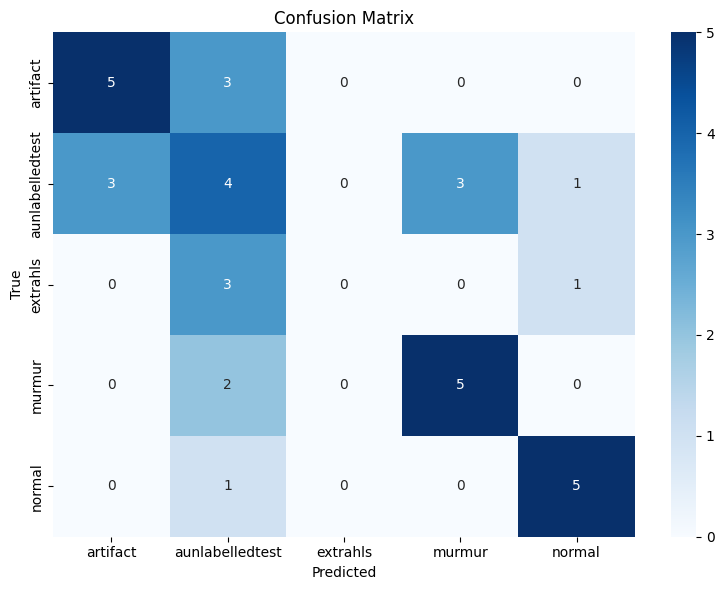

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
y_categorical.shape

(176, 5)

In [ ]:
# ROC-AUC (only if binary)
if y_categorical.shape[1] == 2:
    auc = roc_auc_score(y_true_classes, y_pred_probs[:, 1])
    fpr, tpr, _ = roc_curve(y_true_classes, y_pred_probs[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout

# -----------------------------
# Parameters
# -----------------------------
FOLDER = "HeartSounds"  # Your folder path with all .wav files
SR = 1000               # Sampling rate
DURATION = 3            # Seconds
MAX_LEN = SR * DURATION
N_MELS = 64             # Mel bands
N_FFT = 256
HOP_LENGTH = 128

# -----------------------------
# Load and preprocess data using Mel Spectrogram
# -----------------------------
def extract_mel_spectrogram(signal, sr):
    mel = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=N_MELS, n_fft=N_FFT, hop_length=HOP_LENGTH)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    return mel_db

def load_data(folder):
    X, y = [], []
    for fname in os.listdir(folder):
        if fname.endswith(".wav"):
            label = fname.split("_")[0].lower()
            path = os.path.join(folder, fname)

            signal, _ = librosa.load(path, sr=SR)
            if len(signal) < MAX_LEN:
                signal = np.pad(signal, (0, MAX_LEN - len(signal)))
            else:
                signal = signal[:MAX_LEN]

            mel_spec = extract_mel_spectrogram(signal, SR)
            X.append(mel_spec)
            y.append(label)

    return np.array(X), np.array(y)

X, y = load_data(FOLDER)

# Convert Mel-Spectrograms to (samples, time, mel) for Conv1D
X = X.transpose((0, 2, 1))

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)

# -----------------------------
# CNN1D Model for Time-Frequency Features
# -----------------------------
def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(32, 5, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(64, 5, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model(X_train.shape[1:], num_classes=y_categorical.shape[1])
model.summary()

# Train model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1)

# Evaluate model
scores = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {scores[1]*100:.2f}%")

# Predict classes
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC-AUC (only if binary)
if y_categorical.shape[1] == 2:
    auc = roc_auc_score(y_true_classes, y_pred_probs[:, 1])
    fpr, tpr, _ = roc_curve(y_true_classes, y_pred_probs[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Predict single file
def predict_single(filepath):
    signal, _ = librosa.load(filepath, sr=SR)
    if len(signal) < MAX_LEN:
        signal = np.pad(signal, (0, MAX_LEN - len(signal)))
    else:
        signal = signal[:MAX_LEN]

    mel_spec = extract_mel_spectrogram(signal, SR).T
    mel_spec = np.expand_dims(mel_spec, axis=0)
    prediction = model.predict(mel_spec)
    predicted_label = encoder.inverse_transform([np.argmax(prediction)])
    return predicted_label[0]

# Example:
# print(predict_single("HeartSounds/abnormal_201105060608.wav"))
